# <span style="color:gold">Model Comparison</span>

MODELS: 
model1 = Senquential
model2 = VGG16
model3 = VGG19
model4 = AleNet
model5 = ResNet

LABELS:
0 = Apple
1 = Avocado
2 = Banana
3 = Cherry
4 = Kiwi

Models are tested only with one batch of images, which are 32.
Thats why the nunbers and quantity are so low in the confusion matrices.

## Libraries

In [11]:
%pip install matplotlib
%pip install numpy
%pip install tensorflow
%pip install pandas
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import tensorflow as tf
from tensorflow.keras.models import load_model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
SEED = 456
random.seed(SEED)


## Import Models

In [13]:
model1 = load_model('models/1-ModelSecuential.h5')
model2 = load_model('models/2-VGG16_Model.h5')
model3 = load_model('models/3-VGG19_Model.h5')
model4 = load_model('models/4-Modelo4_AleNet.h5')
model5 = load_model('models/5-Modelo6 - ResNet.h5')

In [14]:
models = []
models.append(model1)
models.append(model2)
models.append(model3)
models.append(model4)
models.append(model5)

## Import useful data

In [15]:
batch_size = 32
data_dir = "fruits"
img_height = 224
img_width = 224

In [16]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int')
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int')
ds = tf.keras.preprocessing.image_dataset_from_directory(
      data_dir,
      labels='inferred',
      color_mode='rgb',
      batch_size=32,
      image_size=(img_height, img_width),
      shuffle=True,
      seed=SEED,
      label_mode='int'
  )

Found 1601 files belonging to 5 classes.
Using 1281 files for training.
Found 1601 files belonging to 5 classes.
Using 320 files for validation.
Found 1601 files belonging to 5 classes.


In [17]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert train_split + val_split + test_split == 1.0
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=SEED)

        train_size = int(train_split * ds_size)
        val_size = int(val_split * ds_size)

        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size + val_size)
    return train_ds, test_ds, val_ds
train_ds, test_ds, val_ds = get_dataset_partition_tf(ds, shuffle_size=10000, train_split = 0.6, val_split = 0.2, test_split = 0.2)

In [18]:
# Listas para almacenar las características (X_test) y las etiquetas (y_test)
X_test = []
y_test = []

# Itera sobre el dataset de prueba
for features, labels in test_ds:
    X_test.append(features.numpy())  # Convertir los tensores a arrays de NumPy
    y_test.append(labels.numpy())

# Convertir las listas a arrays de NumPy
X_test = np.array(X_test)
y_test = np.array(y_test)

In [25]:
print(X_test.shape)

(11, 32, 224, 224, 3)


In [27]:
X_test_batch_1 = X_test[0]  # Extrae el primer lote de imágenes
y_test_batch_1 = y_test[0]  # Extrae el primer lote de etiquetas

In [29]:
results = []
for model in models:
    # Predicciones
    y_pred = model.predict(X_test_batch_1)
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Métricas
    acc = accuracy_score(y_test_batch_1, y_pred_labels)
    precision = precision_score(y_test_batch_1, y_pred_labels, average='weighted') 
    recall = recall_score(y_test_batch_1, y_pred_labels, average='weighted')       
    f1 = f1_score(y_test_batch_1, y_pred_labels, average='weighted')               
    conf_matrix = confusion_matrix(y_test_batch_1, y_pred_labels)

    # Guardar resultados
    results.append({
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
    })


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


c:\Users\benjo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


c:\Users\benjo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


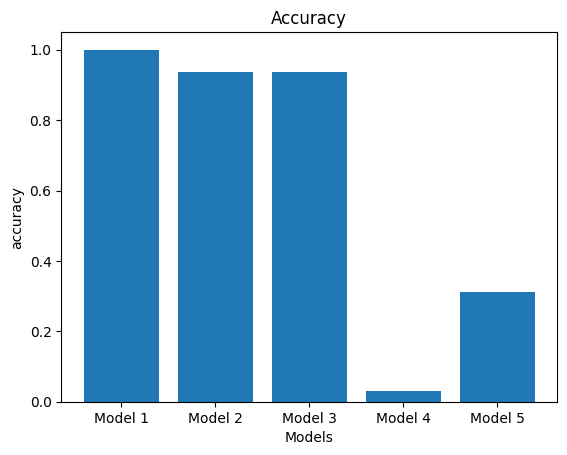

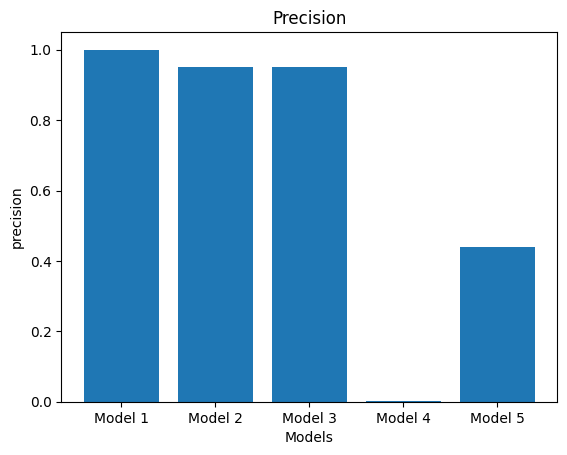

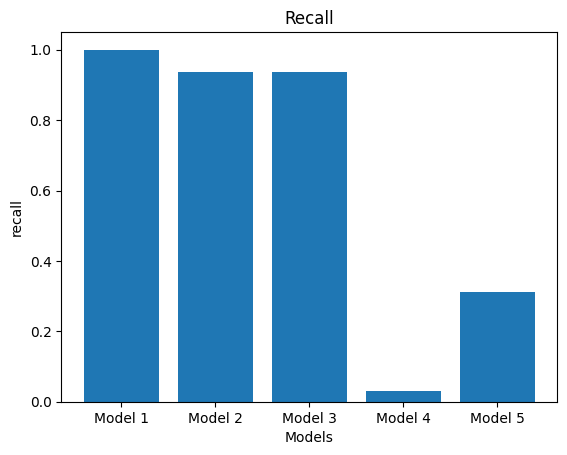

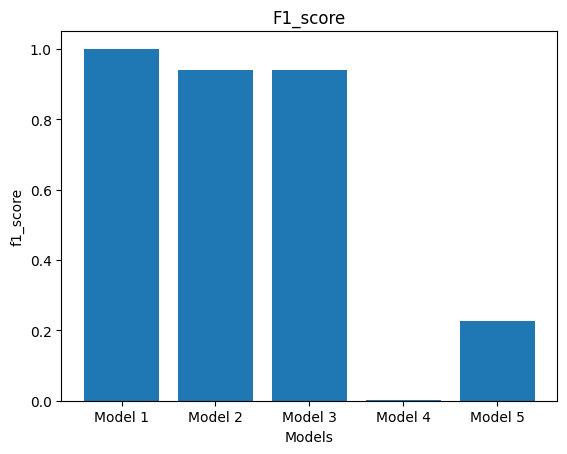

In [30]:
metric_names = ['accuracy', 'precision', 'recall', 'f1_score']
model_names = [f'Model {i+1}' for i in range(len(models))]

# Crear gráficos
for metric in metric_names:
    values = [result[metric] for result in results]
    plt.figure()
    plt.bar(model_names, values)
    plt.title(metric.capitalize())
    plt.ylabel(metric)
    plt.xlabel('Models')
    plt.show()



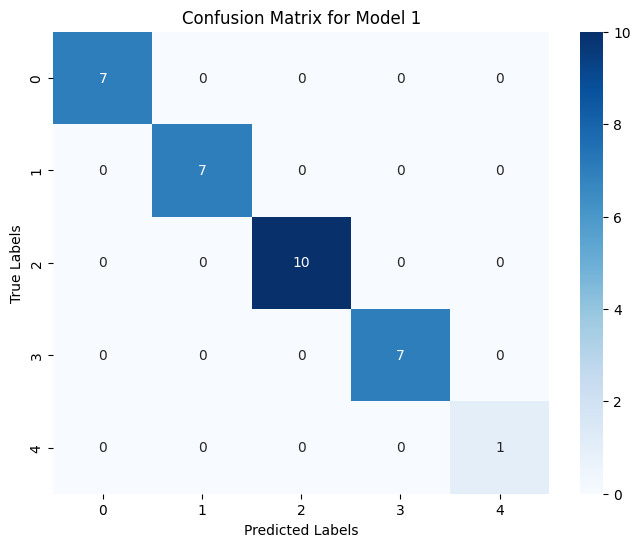

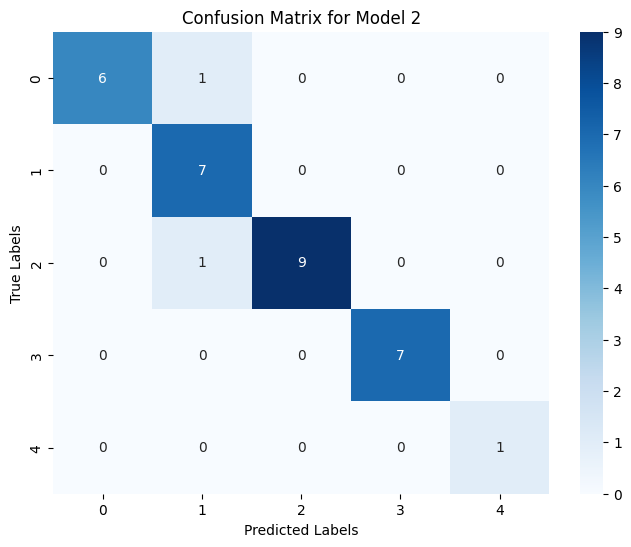

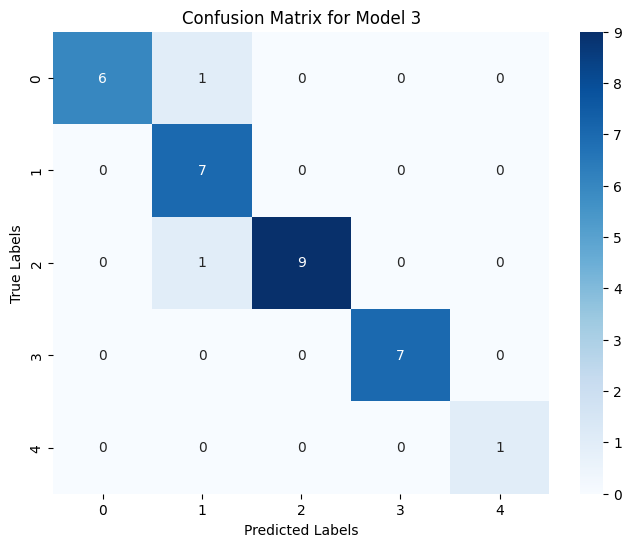

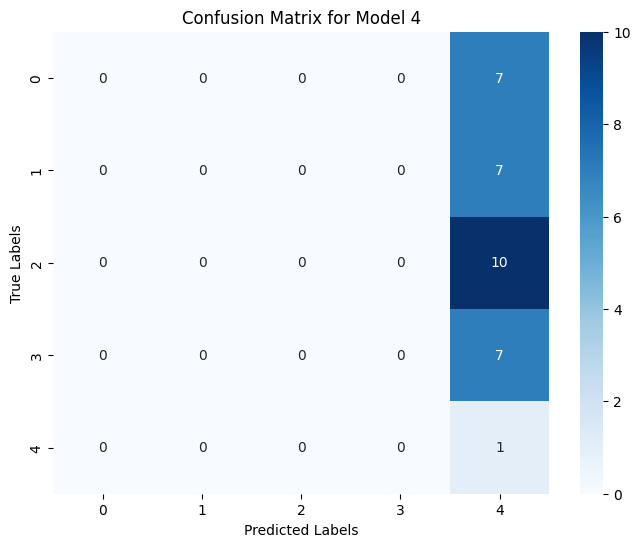

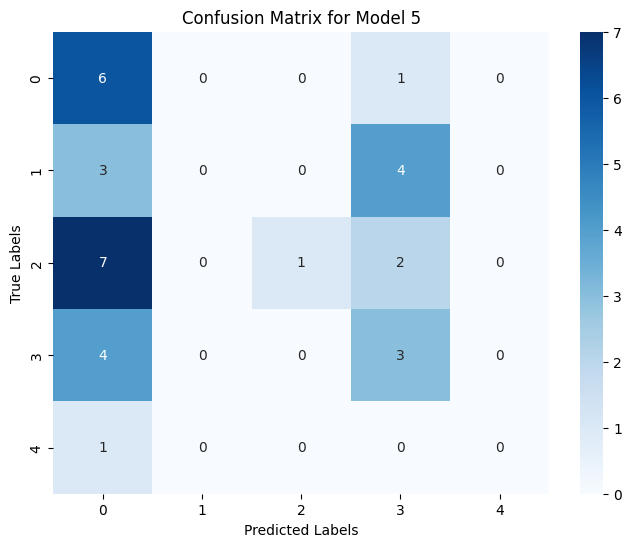

In [31]:
for i, result in enumerate(results):
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for Model {i+1}')
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    plt.show()
